# Question 1
## Introduction: Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.
  ### Occupations
  #### Step 1. Import the necessary libraries
  #### Step 2. Import the dataset from this address.
  #### Step 3. Assign it to a variable called users
  #### Step 4. Discover what is the mean age per occupation
  #### Step 5. Discover the Male ratio per occupation and sort it from the most to the least
  #### Step 6. For each occupation, calculate the minimum and maximum ages
  #### Step 7. For each combination of occupation and sex, calculate the mean age
  #### Step 8. For each occupation present the percentage of women and men

In [3]:
#step 1
import numpy as np  # Import Numpy library and use the standard abbreviation \"np\"\n",
import pandas as pd # Import Pandas library and use the standard abbreviation \"pd\"\n",
import urllib

In [6]:
#step 2
dataset_url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
urlRequest = urllib.request.Request(dataset_url)
users_file = urllib.request.urlopen(urlRequest)

In [7]:
#step 3
users=pd.read_csv(users_file,sep='|',header=0,names=['user_id','age','gender','occupation','zip_code'])
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [8]:
#step 4
mean_of_age=users['age'].mean()
mean_of_age

34.05196182396607

In [9]:
#step 5
df=users[users.gender=='M']

df=(df.groupby(['occupation','gender'])['gender'].agg(['count'])/100).sort_values(by=['count'], ascending=False)
df.head()

,,count
occupation,gender,
student,M,1.36
other,M,0.69
educator,M,0.69
engineer,M,0.65
programmer,M,0.60


In [10]:
#step 6
occupation = users.groupby('occupation')
age=occupation.age
min_age=age.min()
max_age=age.max()
pd.DataFrame({'min age':min_age,'max age':max_age})

,min age,max age
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [11]:
#step 7
occupation_gender = users.groupby(['occupation','gender'])
mean_age=occupation_gender['age'].mean().round(1)
pd.DataFrame({'mean age':mean_age})

mean age
occupation    gender          
administrator F           40.6
              M           37.2
artist        F           30.3
              M           32.3
doctor        M           43.6
educator      F           39.1
              M           43.1
engineer      F           29.5
              M           36.6
entertainment F           31.0
              M           29.0
executive     F           44.0
              M           38.2
healthcare    F           39.8
              M           45.4
homemaker     F           34.2
              M           23.0
lawyer        F           39.5
              M           36.2
librarian     F           40.0
              M           40.0
marketing     F           37.2
              M           37.9
none          F           36.5
              M           18.6
other         F           35.5
              M           34.0
programmer    F           32.2
              M           33.2
retired       F           70.0
              M           62.5
salesman      F           27.0
              M           38.6
scientist     F           28.3
              M           36.3
student       F           20.8
              M           22.7
technician    F           38.0
              M           33.0
writer        F           37.6
              M           35.3

In [12]:
#step 8
occupation = users.groupby(['occupation'])
men_and_women = occupation.gender
precentage=(men_and_women.value_counts(normalize=True)*100).round(1).astype(str)+'%'
pd.DataFrame({'presentage':precentage})

presentage
occupation    gender           
administrator M           54.4%
              F           45.6%
artist        M           53.6%
              F           46.4%
doctor        M          100.0%
educator      M           72.6%
              F           27.4%
engineer      M           97.0%
              F            3.0%
entertainment M           88.9%
              F           11.1%
executive     M           90.6%
              F            9.4%
healthcare    F           68.8%
              M           31.2%
homemaker     F           85.7%
              M           14.3%
lawyer        M           83.3%
              F           16.7%
librarian     F           56.9%
              M           43.1%
marketing     M           61.5%
              F           38.5%
none          M           55.6%
              F           44.4%
other         M           65.7%
              F           34.3%
programmer    M           90.9%
              F            9.1%
retired       M           92.9%
              F            7.1%
salesman      M           75.0%
              F           25.0%
scientist     M           90.3%
              F            9.7%
student       M           69.4%
              F           30.6%
technician    M           96.3%
              F            3.7%
writer        M           57.8%
              F           42.2%

# Question 2
## Euro Teams
#### Step 1. Import the necessary libraries
####  Step 2. Import the dataset from this address
#### Step 3. Assign it to a variable called euro12
#### Step 4. Select only the Goal column
#### Step 5. How many team participated in the Euro2012?
#### Step 6. What is the number of columns in the dataset?
#### Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
#### Step 8. Sort the teams by Red Cards, then to Yellow Cards
#### Step 9. Calculate the mean Yellow Cards given per Team
#### Step 10. Filter teams that scored more than 6 goalsStep
#### Step 11. Select the teams that start with G
#### Step 12. Select the first 7 columns
#### Step 13. Select all columns except the last 3
#### Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [13]:
#Step 1
import pandas as pd
import urllib
import numpy as np

In [14]:
#step 2
dataset_url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
urlRequest = urllib.request.Request(dataset_url)
euro12_file = urllib.request.urlopen(urlRequest)

In [15]:
#step 3
euro12 =pd.read_csv(euro12_file)
euro12.head(3)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15


In [16]:
#step 4
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [17]:
#step 5
euro12['Team'].count()

16

In [18]:
#step 6
euro12.shape[1]

35

In [19]:
#step 7
discipline=euro12[['Team','Yellow Cards','Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [20]:
#step 8
discipline=discipline.sort_values(by=['Red Cards','Yellow Cards'], ascending=True)
discipline

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [21]:
#step 9
discipline.groupby('Team')['Yellow Cards'].agg('mean')

Team
Croatia                 9
Czech Republic          7
Denmark                 4
England                 5
France                  6
Germany                 4
Greece                  9
Italy                  16
Netherlands             5
Poland                  7
Portugal               12
Republic of Ireland     6
Russia                  6
Spain                  11
Sweden                  7
Ukraine                 5
Name: Yellow Cards, dtype: int64

In [22]:
#step 10
euro12.loc[euro12['Goals']>6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [23]:
#step 11
euro12[euro12['Team'].str.contains('^G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [24]:
#step 12
euro12.head(7)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [25]:
#step 13
euro12.iloc[:,:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [26]:
#step 14
euro12.loc[(euro12['Team']=='England') | (euro12['Team']=='Russia') | (euro12['Team']=='Italy'),['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3
#### ## Housing
#### Step 1. Import the necessary libraries
#### Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000
#### Step 3. Create a DataFrame by joinning the Series by column
#### Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
#### Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
#### Step 6. Ops it seems it is going only until index 99. Is it true?
#### Step 7. Reindex the DataFrame so it goes from 0 to 299

In [27]:
#step 1
import numpy as np
import pandas as pd

In [28]:
#step 2
series1=pd.Series(np.random.randint(1,4,size=100))
series2=pd.Series(np.random.randint(1,3,size=100))
series3=pd.Series(np.random.randint(10000,30000,size=100))

In [29]:
#step 3
df=pd.DataFrame({'Series 1':series1,'Series 2':series2,'Series 3':series3})
df

,Series 1,Series 2,Series 3
0,1,2,21032
1,3,1,13892
2,1,1,24895
3,2,1,23604
4,1,2,29016
...,...,...,...
95,1,2,24802
96,3,1,23693
97,1,2,26636
98,2,2,21138


In [30]:
#step 4
df=df.rename(columns={'Series 1':'bedrs','Series 2':'bathrs','Series 3':'price_sqr_meter'})
df

,bedrs,bathrs,price_sqr_meter
0,1,2,21032
1,3,1,13892
2,1,1,24895
3,2,1,23604
4,1,2,29016
...,...,...,...
95,1,2,24802
96,3,1,23693
97,1,2,26636
98,2,2,21138


In [31]:
#step 5
df2=pd.concat([series1,series2,series3],axis=0)
df2

0         1
1         3
2         1
3         2
4         1
      ...  
95    24802
96    23693
97    26636
98    21138
99    24386
Length: 300, dtype: int32

In [32]:
#step 6
df2.tail()
#yes! it is true

95    24802
96    23693
97    26636
98    21138
99    24386
dtype: int32

In [33]:
#step 7
df2=pd.concat([series1,series2,series3],axis=0,ignore_index=True)
df2


0          1
1          3
2          1
3          2
4          1
       ...  
295    24802
296    23693
297    26636
298    21138
299    24386
Length: 300, dtype: int32

# Question 4
## Wind Statistics
### The data have been modified to contain some missing values, identified by NaN. Using pandas should make this exercise easier, in particular for the bonus question. You should be able to perform all of these operations without using a for loop or other looping construct.
## The data in 'wind.data' has the following format:
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71
The first three columns are year, month, and day. The remaining 12 columns areaverage windspeeds in knots at 12 locations in Ireland on that day.
#### Step 1. Import the necessary libraries
#### Step 2. Import the dataset from the attached file wind.txt
#### Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
#### Step 4. Year 2061? Do we really have data from this year? Create a function to fix itand apply it.
#### Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
#### Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
#### Step 7. Compute how many non-missing values there are in total.
#### Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
#### A single number for the entire dataset.
#### Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all thedays A different set of numbers for each location.
#### Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.A different set of numbers for each day.
#### Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.
#### Step 12. Downsample the record to a yearly frequency for each location.
#### Step 13. Downsample the record to a monthly frequency for each location.
#### Step 14. Downsample the record to a weekly frequency for each location.
#### Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [34]:
#step 1
import numpy as np
import pandas as pd
import datetime as dt

In [35]:
#step 2
data=pd.read_fwf('wind.txt')

In [36]:
#step 3
data["Date"] = pd.to_datetime(data[["Yr","Mo","Dy"]].astype(str).agg('-'.join, axis=1))
data = data.drop(columns=["Yr","Mo","Dy"])
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2061-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,2061-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,2061-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,2061-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,2061-01-05


In [37]:
#step 4
data["Date"] = np.where(pd.DatetimeIndex(data["Date"]).year < 2000,data.Date,data.Date - pd.offsets.DateOffset(years=100))
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-01-05


In [38]:
#step 5
data = data.set_index("Date")
data.index.astype("datetime64[ns]")

DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='Date', length=6574, freq=None)

In [39]:
#step 6
data.isnull().values.ravel().sum()

31

In [40]:

#step 7
data.count().sum()

78857

In [80]:
#step 8
pd.DataFrame(data.mean())

,0
RPT,12.362987
VAL,10.644314
ROS,11.660526
KIL,6.306468
SHA,10.455834
BIR,7.092254
DUB,9.797343
CLA,8.495053
MUL,8.493590
CLO,8.707332


In [86]:
#step 9
def stats(stats):
    stats = pd.Series(stats)
    Min = stats.min()
    Max = stats.max()
    Mean = stats.mean()
    Std = stats.std()
    res = [Min,Max,Mean,Std]
    indx = ["Min","Max","Mean","Std"]
    res = pd.Series(res,index=indx)
    return res
loc_stats = data.apply(stats)
pd.DataFrame(loc_stats)

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
Max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
Mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
Std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


In [83]:
#step 10
day_stats = data.apply(stats,axis=1)
pd.DataFrame(day_stats.head())

,Min,Max,Mean,Std
Date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


In [85]:
#step 11
jan_data = data[data.index.month == 1]
pd.DataFrame(jan_data.mean())

,0
RPT,14.847325
VAL,12.914560
ROS,13.299624
KIL,7.199498
SHA,11.667734
BIR,8.054839
DUB,11.819355
CLA,9.512047
MUL,9.543208
CLO,10.053566


In [45]:
#step 12
data.resample('A').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-12-31,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962-12-31,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-12-31,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-12-31,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [46]:
#step 13
data.resample('M').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-31,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02-28,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03-31,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09-30,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10-31,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [47]:
#step 14
data.resample('W').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


In [48]:
#step 15
first_year = data[data.index.year == 1961]
stats1 = data.resample('W').mean().apply(lambda x: x.describe())
stats1

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,940.000000,940.000000,940.000000,940.000000,939.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,12.365304,10.647725,11.661255,6.309334,10.455607,7.094787,9.801271,8.496123,8.496452,8.710639,13.125912,15.597171
std,3.466600,3.372501,2.840361,2.186432,3.146715,2.556633,3.308180,2.853029,2.638349,2.924546,3.757189,4.468526
min,3.874286,2.452857,4.901429,1.447143,2.775714,1.382857,2.471429,2.284286,2.262857,1.571429,3.661429,5.124286
25%,9.884286,8.277857,9.613929,4.742857,8.248571,5.211071,7.432500,6.470000,6.589286,6.530000,10.346429,12.269286
50%,12.291429,10.486429,11.490000,6.165714,10.254286,6.933571,9.603571,8.358571,8.394286,8.490000,12.846429,15.330714
75%,14.547143,12.757857,13.457143,7.584286,12.627143,8.842500,11.942143,10.457500,10.108571,10.699643,15.513571,18.683929
max,24.010000,23.715714,21.384286,14.517143,22.897143,16.010000,20.474286,17.861429,17.460000,17.932857,26.617143,30.374286


# Question 5
#### Step 1. Import the necessary libraries
#### Step 2. Import the dataset from this address.
#### Step 3. Assign it to a variable called chipo.
#### Step 4. See the first 10 entries
#### Step 5. What is the number of observations in the dataset?
#### Step 6. What is the number of columns in the dataset?
#### Step 7. Print the name of all the columns.
#### Step 8. How is the dataset indexed?
#### Step 9. Which was the most-ordered item?
#### Step 10. For the most-ordered item, how many items were ordered?
#### Step 11. What was the most ordered item in the choice_description column?
#### Step 12. How many items were orderd in total?
#### Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type
#### Step 14. How much was the revenue for the period in the dataset?
#### Step 15. How many orders were made in the period?
#### #### Step 16. What is the average revenue amount per order?
#### Step 17. How many different items are sold?

In [49]:
#step 1
import pandas as pd
import numpy as np
import urllib

In [50]:
#step 2
dataset_url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
urlRequest = urllib.request.Request(dataset_url)
chipo_file = urllib.request.urlopen(urlRequest)

In [51]:
#step 3
chipo=pd.read_csv(chipo_file,sep='\t')

In [52]:
#step 4
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [53]:
#step 5
chipo.count()

order_id              4622
quantity              4622
item_name             4622
choice_description    3376
item_price            4622
dtype: int64

In [54]:
#step 6
chipo.shape[1]

5

In [55]:

#step 7
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [56]:
#step 8
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [57]:
#step 9
a=chipo.groupby('item_name').sum().sort_values(by=['quantity'], ascending=False)
a.T.columns[0]

'Chicken Bowl'

In [58]:

#step 10
a['quantity'][0]

761

In [59]:
#step 11
a=chipo.groupby('choice_description').sum().sort_values(by=['quantity'], ascending=False)
a.T.columns[0]

'[Diet Coke]'

In [60]:
#step 12
chipo.quantity.sum()

4972

In [61]:
#step 13
chipo.item_price.dtype
price_type = lambda x: float(x[1:-1])
chipo.item_price = chipo.item_price.apply(price_type)
chipo.item_price.dtype

dtype('float64')

In [62]:
#step 14
(chipo['item_price']*chipo['quantity']).sum()

39237.02

In [63]:
#step 15
chipo.order_id.value_counts().count()

1834

In [64]:
#step 16
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
d = chipo.groupby('order_id').sum()
d.mean()['revenue']

21.394231188658654

In [65]:
#step 17
chipo.item_name.value_counts().count()

50

# Question 6
Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('us-marriages-divorces-1867-2014.csv')
df.head()


,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


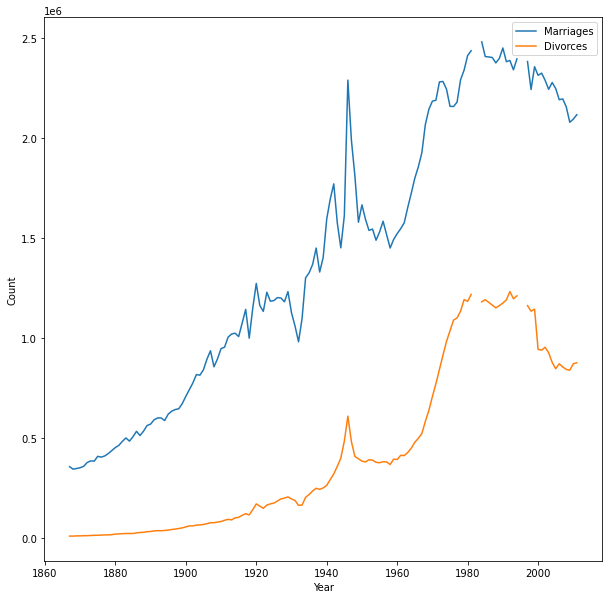

In [69]:

plt.figure(figsize=(10,10))

plt.plot(df['Year'],df['Marriages'],label='Marriages')
plt.plot(df['Year'],df['Divorces'],label='Divorces')

plt.xlabel('Year')
plt.ylabel('Count')


plt.legend()
plt.show()

# Question 7
Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

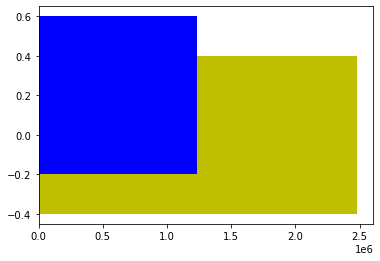

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('us-marriages-divorces-1867-2014.csv')
df.tail()
df=df.loc[(df['Year']<2000) &(df['Year']>1900),['Marriages','Divorces']]

ax = plt.subplot(111)
ax.barh(0.0, df['Marriages'],  color='y', align='center')
ax.barh(0.2, df['Divorces'], color='b', align='center')

plt.show()

# Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!

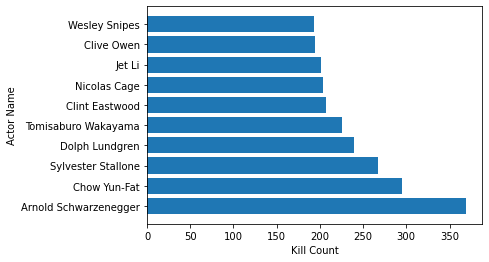

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv('actor_kill_counts.csv')

# Sort the actors by their kill count
df_sorted = df.sort_values(by=['Count'], ascending=False)

# Create a horizontal bar chart
plt.barh(df_sorted['Actor'], df_sorted['Count'])

# Label the x and y axes
plt.xlabel('Kill Count')
plt.ylabel('Actor Name')

# Show the chart
plt.show()


# Question 9
Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

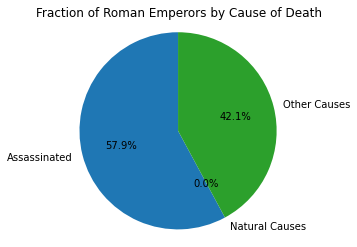

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('roman-emperor-reigns.csv')

assassinated_count = df[df['Cause_of_Death'] == 'Assassinated'].shape[0]
natural_causes_count = df[df['Cause_of_Death'] == 'Natural Causes'].shape[0]
other_causes_count = df[df['Cause_of_Death'].isin(['Illness', 'Executed', 'Killed in battle'])].shape[0]
total_count = df.shape[0]

# Calculate the percentage of emperors who died from different causes
assassinated_percent = assassinated_count / total_count * 100
natural_causes_percent = natural_causes_count / total_count * 100
other_causes_percent = other_causes_count / total_count * 100

# Create a list of the percentages and labels for the pie chart
percentages = [assassinated_percent, natural_causes_percent, other_causes_percent]
labels = ['Assassinated', 'Natural Causes', 'Other Causes']

# Create the pie chart with even circle and percentage labels
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')

# Add a title to the pie chart
plt.title('Fraction of Roman Emperors by Cause of Death')

# Display the pie chart
plt.show()


# Question 10
Create a scatter plot showing the relationship between the total revenue earned byarcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.
Don't forget to label your axes! Color each dot according to its year.

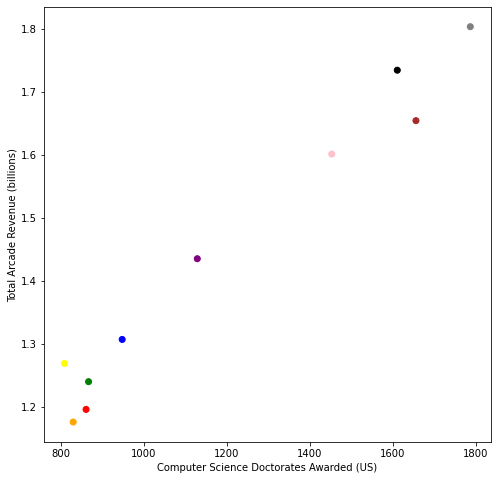

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

color_dict = {2000: 'red', 2001: 'orange', 2002: 'yellow', 2003: 'green', 2004: 'blue', 2005: 'purple', 2006: 'pink', 2007: 'brown', 2008: 'gray', 2009: 'black'}
colors = [color_dict[year] for year in df['Year']]

plt.figure(figsize=(8, 8))
plt.scatter(df['Computer Science Doctorates Awarded (US)'], df['Total Arcade Revenue (billions)'], c=colors)

# Add labels for the x and y axes
plt.xlabel('Computer Science Doctorates Awarded (US)')
plt.ylabel('Total Arcade Revenue (billions)')

plt.show()
